# Mini Project 3

Choose a dataset or select a question and identify and gather the data you need. 
Perform EDA on the data, identify features and a target variable, and apply 
predictive models including `decision trees` and `ensemble methods`. Evaluate 
these and present your findings.

Present from slides in 8-12 minutes on Monday 2 August 2021

## Background
A game of chess is divided into three distinct phases, known as the Opening, the Middlegame, and the Endgame, each of which has its own strategies (although there are many strategies that apply equally to all three).

If neither player achieves a knockout blow in the middlegame, the game will eventually reach the endgame. This is the stage of the game when most of the pieces have been captured and only a few remain.
<div style="text-align: right">-Chess Strategy Online 2015</div>

In this project we will look into the Chess Endgame Database to find out the best endgame position for white and black, assuming white has a rook and king left, black only has the king left, and it is black's turn to move. The goal for White is to win the game, while the goal for Black is to force a draw. In this study, a draw occurs when `1) White cannot checkmate in 16 moves`, and `2) Black cannot make a move when it is his turn`.

## Goals
- Find the best position for white and black
- Develop a model to predict results according to the piece's position

## Dataset
Chess Endgame Database for White King and Rook against Black King (KRK) - Black-to-move Positions Drawn or Lost in N Moves.

## Source
Creators: Database generated by Michael Bain and Arthur van Hoff at the Turing Institute, Glasgow, UK.

Donor: Michael Bain (mike '@' cse.unsw.edu.au), AI Lab, Computer Science
University of New South Wales, Sydney 2052, Australia.

## Table of Contents
1. Import Libraries
2. Load Data
3. EDA and Clean Data
4. Feature Engineering
5. Modelling
6. Testing

7. Conclusion

### 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import string
from pattern.en import number
from math import sqrt


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Load Data

In [2]:
# Set column names
col = ["w_king_file", "w_king_rank", "w_rook_file", "w_rook_rank", "b_king_file", "b_king_rank", "winning_moves"]

df = pd.read_csv("krkopt.data", header=None, names=col)
df

,w_king_file,w_king_rank,w_rook_file,w_rook_rank,b_king_file,b_king_rank,winning_moves
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,sixteen
28052,b,1,g,7,e,6,sixteen
28053,b,1,g,7,e,7,sixteen
28054,b,1,g,7,f,5,sixteen


### 3. EDA and Clean Data

In [3]:
# Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   w_king_file    28056 non-null  object
 1   w_king_rank    28056 non-null  int64 
 2   w_rook_file    28056 non-null  object
 3   w_rook_rank    28056 non-null  int64 
 4   b_king_file    28056 non-null  object
 5   b_king_rank    28056 non-null  int64 
 6   winning_moves  28056 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [4]:
# No null value was found

In [5]:
## Check illegal values

# File range: a - h
bad_file = string.ascii_lowercase[8:]
# Rank range: 1 - 8

# Find the index of illegal value
bad_ind = []
for i in df.index:
    if df.loc[i,"w_king_file"] in bad_file or df.loc[i,"w_rook_file"] in bad_file or df.loc[i,"b_king_file"] in bad_file \
    or df.loc[i,"w_king_rank"] not in range(1,9) or df.loc[i,"w_rook_rank"] not in range(1,9) or df.loc[i,"b_king_rank"] not in range(1,9):
        bad_ind.append(i)

# Show number of rows with illegal value
print(len(bad_ind))

# Drop those rows
df = df.drop(bad_ind)

0


In [6]:
# Drop row if winning_moves is zero. It is a checkmate.
df = df.drop(df[df["winning_moves"] == "zero"].index)

In [7]:
# Change values under "winning_moves" from str to int. "draw" becomes "17"
for i in df.index:
    if df.loc[i, "winning_moves"] == "draw":
        df.loc[i, "winning_moves"] = 17
    else:
        df.loc[i, "winning_moves"] = number(df.loc[i, "winning_moves"])

In [8]:
# Clean data
df

,w_king_file,w_king_rank,w_rook_file,w_rook_rank,b_king_file,b_king_rank,winning_moves
0,a,1,b,3,c,2,17
1,a,1,c,1,c,2,17
2,a,1,c,1,d,1,17
3,a,1,c,1,d,2,17
4,a,1,c,2,c,1,17
...,...,...,...,...,...,...,...
28051,b,1,g,7,e,5,16
28052,b,1,g,7,e,6,16
28053,b,1,g,7,e,7,16
28054,b,1,g,7,f,5,16


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28029 entries, 0 to 28055
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   w_king_file    28029 non-null  object
 1   w_king_rank    28029 non-null  int64 
 2   w_rook_file    28029 non-null  object
 3   w_rook_rank    28029 non-null  int64 
 4   b_king_file    28029 non-null  object
 5   b_king_rank    28029 non-null  int64 
 6   winning_moves  28029 non-null  object
dtypes: int64(3), object(4)
memory usage: 2.7+ MB


### 4. Feature Engineering

In [10]:
# Make a copy dataframe
df2 = df.copy()

In [11]:
## Convert the file and rank into x-y coordinate

# File to x
file = {"a": 1, "b": 2, "c": 3, "d": 4, "e": 5, "f": 6, "g": 7, "h": 8}

for i in df2.index:
    df2.loc[i, "w_king_file"] = file[df2.loc[i, "w_king_file"]]
    df2.loc[i, "w_rook_file"] = file[df2.loc[i, "w_rook_file"]]
    df2.loc[i, "b_king_file"] = file[df2.loc[i, "b_king_file"]]
    
# Rename columns
df2.rename(columns={"w_king_file": "w_king_x", "w_king_rank": "w_king_y", \
                    "w_rook_file": "w_rook_x", "w_rook_rank": "w_rook_y", \
                    "b_king_file": "b_king_x", "b_king_rank": "b_king_y"}, inplace=True)

In [12]:
## Calculate distance between pieces

# Distance between white king and black king
wk_bk = []
# Distance between white rook and black king
wr_bk = []
# Distance between white king and white rook
wk_wr = []
# Distance between pieces and centre
wk_o = []
wr_o = []
bk_o = []

for i in df2.index:
    wk_bk.append(sqrt((df2.loc[i,"w_king_x"] - df2.loc[i,"b_king_x"]) ** 2 + (df2.loc[i,"w_king_y"] - df2.loc[i,"b_king_y"]) ** 2))
    wr_bk.append(sqrt((df2.loc[i,"w_rook_x"] - df2.loc[i,"b_king_x"]) ** 2 + (df2.loc[i,"w_rook_y"] - df2.loc[i,"b_king_y"]) ** 2))
    wk_wr.append(sqrt((df2.loc[i,"w_king_x"] - df2.loc[i,"w_rook_x"]) ** 2 + (df2.loc[i,"w_king_y"] - df2.loc[i,"w_rook_y"]) ** 2))
    wk_o.append(sqrt((df2.loc[i,"w_king_x"] - 4.5) ** 2 + (df2.loc[i,"w_king_y"] - 4.5) ** 2))
    wr_o.append(sqrt((df2.loc[i,"w_rook_x"] - 4.5) ** 2 + (df2.loc[i,"w_rook_y"] - 4.5) ** 2))
    bk_o.append(sqrt((df2.loc[i,"b_king_x"] - 4.5) ** 2 + (df2.loc[i,"b_king_y"] - 4.5) ** 2))

In [13]:
# Put new columns into dataframe
df2 = df2.assign(wk_bk=wk_bk, wr_bk=wr_bk, wk_wr=wk_wr, wk_o=wk_o, wr_o=wr_o, bk_o=bk_o)

In [14]:
# Change data type of all cloumns to int
col2 = ["w_king_x", "w_rook_x", "b_king_x", "winning_moves"]

df2[col2] = df2[col2].astype(int)

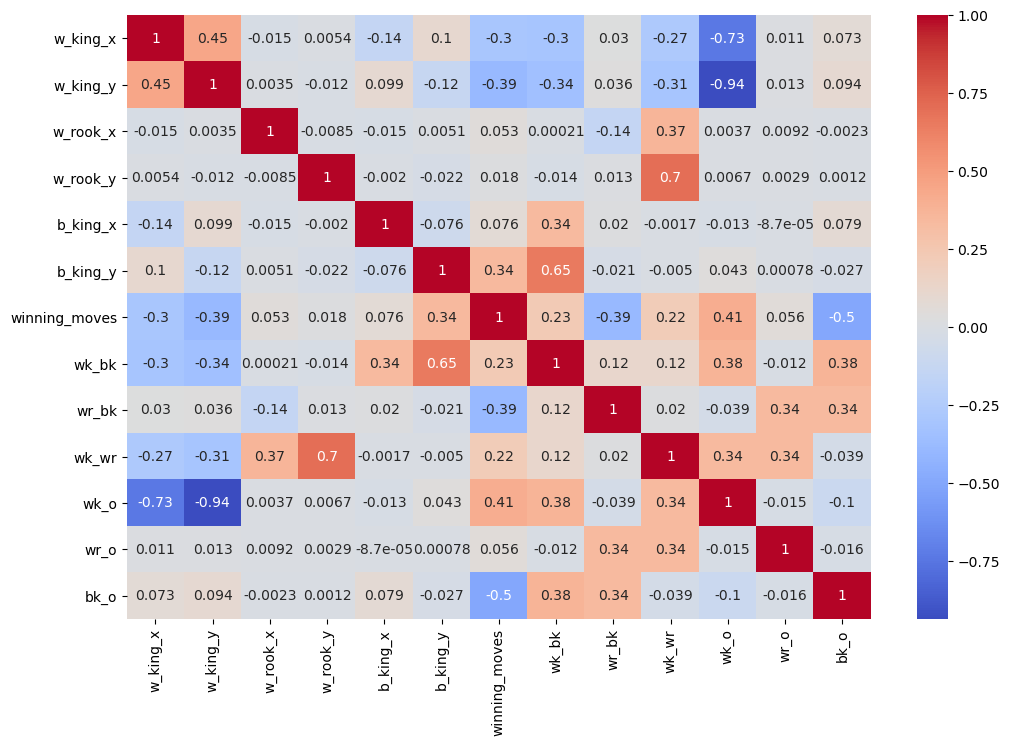

In [15]:
# Plot correlation heatmap
corr = df2.corr()

plt.figure(figsize=(12,8), dpi= 100)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

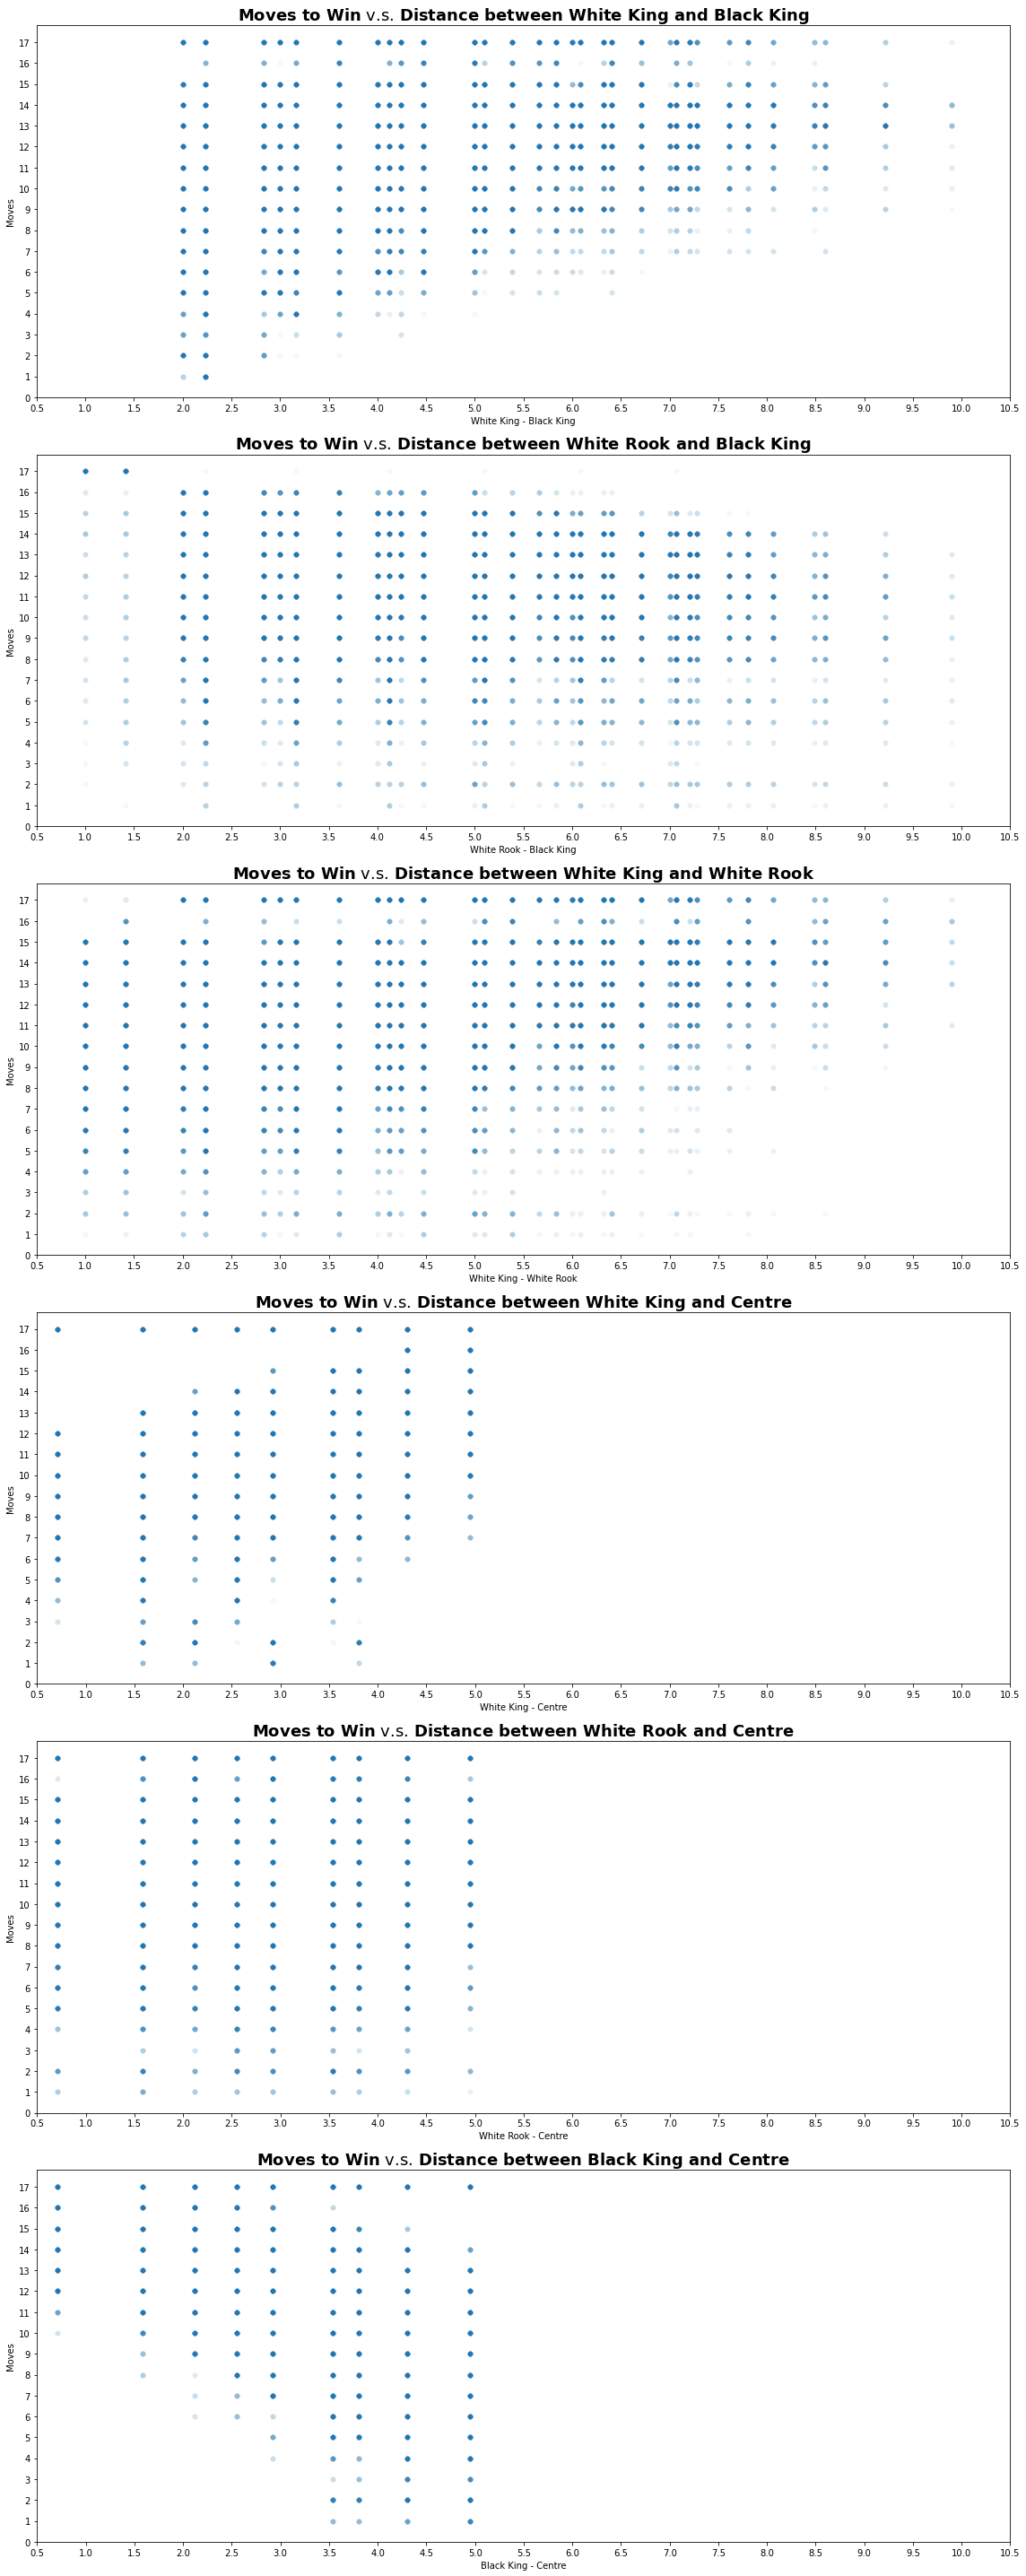

In [16]:
## Visualise relationship between features

# Features
col3 = ["wk_bk", "wr_bk", "wk_wr", "wk_o", "wr_o", "bk_o"]

# Six subplots
fig, ax = plt.subplots(6, 1, figsize=(16, 40))

for i, col in enumerate(col3):
    sns.scatterplot(data=df2, x=col, y="winning_moves", alpha=0.05, ax=ax[i])
    ax[i].set_xticks(np.arange(0.5, 11, 0.5))
    ax[i].set_ylabel("Moves")
    ax[i].set_yticks(np.arange(0, 18))

# Title and xlabel for each subplot
ax[0].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ White\ King\ and\ Black\ King$", fontsize=18)
ax[0].set_xlabel("White King - Black King")
ax[1].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ White\ Rook\ and\ Black\ King$", fontsize=18)
ax[1].set_xlabel("White Rook - Black King")
ax[2].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ White\ King\ and\ White\ Rook$", fontsize=18)
ax[2].set_xlabel("White King - White Rook")
ax[3].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ White\ King\ and\ Centre$", fontsize=18)
ax[3].set_xlabel("White King - Centre")
ax[4].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ White\ Rook\ and\ Centre$", fontsize=18)
ax[4].set_xlabel("White Rook - Centre")
ax[5].set_title(r"$\bfMoves\ to\ Win$" + " v.s. " + r"$\bfDistance\ between\ Black\ King\ and\ Centre$", fontsize=18)
ax[5].set_xlabel("Black King - Centre")

plt.tight_layout()
plt.show()

In [17]:
# Export dataframe
df2.to_csv("clean_krk.csv")

### 5. Modelling
See "Optimal_Chess_KRK-Endgame_Position_(Modelling).ipynb"
### 6. Testing
See "Optimal_Chess_KRK-Endgame_Position_(Modelling).ipynb"

### 7. Conclusion
Although `White Rook` is a powerful piece that can control the entire file and rank, it is unable to checkmate the king alone. White has to coordinate both his `King` and `Rook` well to avoid a draw.

The most significant finding from the figures above is that `Black King` is more likely to survive for at least 10 moves if it is near the centre of the board. In addition, the further `Black King` is away from `White King`, the higher chance `Black King` can survive and perhaps force a draw. On the other hand, White has better chance to win if `White King` is near the centre since it can easily reach `Black King` within 4 moves.